In [1]:
import numpy as np
import pandas as pd
import pypfopt
from pypfopt import risk_models, expected_returns, BlackLittermanModel, plotting
from pypfopt import EfficientFrontier
import yfinance as yf

[*********************100%***********************]  4 of 4 completed


Optimized Weights: OrderedDict([('AAPL', 0.53009), ('AMZN', 0.0), ('GOOG', 0.46991), ('MSFT', 0.0)])


InstantiationError: Adding constraints to an already solved problem might have unintended consequences. A new instance should be created for the new set of constraints.

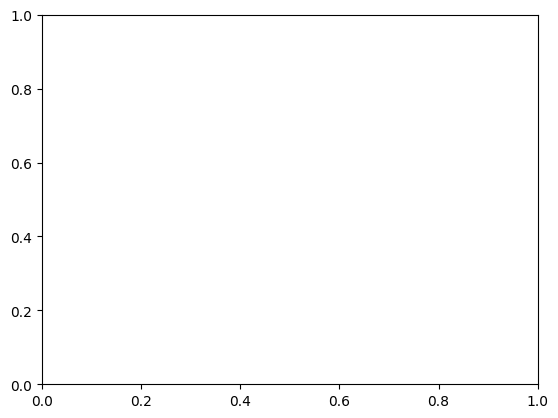

In [ ]:
# Fetch stock data using yFinance
tickers = ["AAPL", "GOOG", "MSFT", "AMZN"]
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")["Adj Close"]

# Calculate the historical mean returns and covariance matrix
mu = expected_returns.mean_historical_return(data)
S = risk_models.sample_cov(data)

# Fetch S&P 500 data for market caps
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(period="1d")
sp500_market_cap = sp500_data["Close"].iloc[-1] * 1e9  # Approximation

# Define the market prior (market capitalization weights)
market_caps = np.array([2.3e12, 1.5e12, 2.0e12, 1.7e12])
market_weights = market_caps / sp500_market_cap

# Define absolute views
# For example, we believe that the expected return of AAPL is 0.20 and MSFT is 0.15
absolute_views = {"AAPL": 0.20, "MSFT": 0.15}

# Create the Black-Litterman model
bl = BlackLittermanModel(S, pi=market_weights, absolute_views=absolute_views)

# Get the posterior expected returns and covariance matrix
bl_return = bl.bl_returns()
bl_cov = bl.bl_cov()

# Optimize the portfolio using the posterior estimates
ef = EfficientFrontier(bl_return, bl_cov)
weights = ef.min_volatility()
cleaned_weights = ef.clean_weights()

print("Optimized Weights:", cleaned_weights)

# Plot the efficient frontier
plotting.plot_efficient_frontier(ef, show_assets=True)